<a href="https://colab.research.google.com/github/Shashankshekharpandey/Stock-closing-price-prediction/blob/main/yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:-**<br>
Yes Bank is a well-known bank in the Indian financial domain. Since 2018,it has been in the news because of the fraud case involving Rana Kapoor.Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

**Business Goal:-**<br>
The main objective is to predict the stock's closing price of the month.

In [1]:
# Importing the libraries

import numpy as np                #  Import numpy for mathematical calculation
import pandas as pd               #  Import pandas for data wrangling
import matplotlib.pyplot as plt   #  Import matplotlib and seaborn for Data Visualization
import seaborn as sns
from datetime import datetime     # Import datetime to convert date column into proper format

# This method is used to split the dataset into training and test set while buliding the model
from sklearn.model_selection import train_test_split

# Import different models for prediction
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 

# import matrix module to evaluate the performance of the model
from sklearn.metrics import *
import pandas.util.testing as tm

# import variance_inflation_factor method to reduce multicollinearity in independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-fc4027255a82>:20: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
yes_bank_df = pd.read_csv("data_YesBank_StockPrices.csv")

In [4]:
yes_bank_df.shape # fetching number of rows and columns from dataframe

(185, 5)

In [5]:
# fetching first five rows from dataset using head() function

yes_bank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
# fetch basic information about the features in our dataframe

yes_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [7]:
# creating a copy of dataframe so that our original dataset not reflect 

stock_price_df = yes_bank_df.copy()

Checking for NULL and Duplicate values

In [8]:
# check if there is any null value or not

stock_price_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

There is no NULL value in the dataset

In [9]:
# check for any duplicate row or not
len(stock_price_df[stock_price_df.duplicated()])

0

There is no DUPLICATE value in the dataset

**Dataset Description**<br>
We have a dataset of YES BANK which contain monthly stock prices of bank since its opening.It contain multiple features like:-

Date :- Date denotes the date of investment(date contains month and year for a particular price) (Object)
Open :- means the price at which a stock started trading (Numerical).
High :-The high is the highest price at which a stock traded during a period (Numerical).
Low :-The low is the minimum price at which a stock traded during a period (Numerical).
Close :- The closing price refers to a stock's trading price closed at the end of a trading day (Numerical).It's a dependent variable which we need to predict from our respetive ML models.The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

In [10]:
stock_price_df.describe(include='all') 

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [11]:
# check the format of "Date" column

stock_price_df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

From the above output,We have seen that the format of Date is "MMMM-YY" .So we need to convert in proper date format "YYYY-MM-DD".Also,convert year into numeric format .

In [12]:
# Converting 'Date' into datetime - 'YYYY-MM-DD' format
# Using Pandas to_datetime() method helps to convert string Date time into Python Date time object
# Apply lambda function to convert  all values of date column to proper format 

stock_price_df['Date'] = pd.to_datetime(stock_price_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))
stock_price_df['Date'] 

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [13]:
# Make "Date" column as index of the dataframe

stock_price_df.set_index('Date', inplace=True)

In [14]:
stock_price_df.tail()

,Open,High,Low,Close
Date,,,,
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15
2020-10-01,13.30,14.01,12.11,12.42
2020-11-01,12.41,14.90,12.21,14.67


In [15]:
# Now only 4 columns are left in the respective dataframe

stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2 KB


**Exploratory Data Analysis**

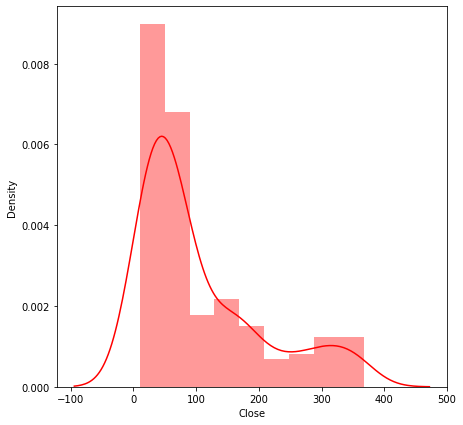

In [16]:
#  Plot the histogram to see Dependent variable 'Close' distribution whcih we need to predict later 

plt.figure(figsize=(7,7))
sns.distplot(stock_price_df['Close'],color="r")

The above distibution is not a Normal Distribution.It's a Positively Skewed Distribution .So,We need to convert it into Normal Distribution using Log Transformation.

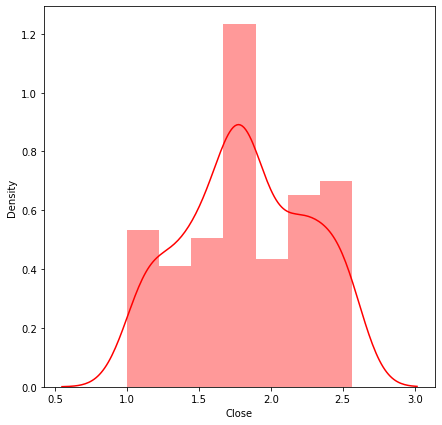

In [17]:
# Dependent variable 'Close' price of a stock

plt.figure(figsize=(7,7))
sns.distplot(np.log10(stock_price_df['Close']),color="r")

Numerical Features

In [18]:
# Check the numerical columns in dataset

numeric_features = stock_price_df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

**Checking the Distribution and Outliers**

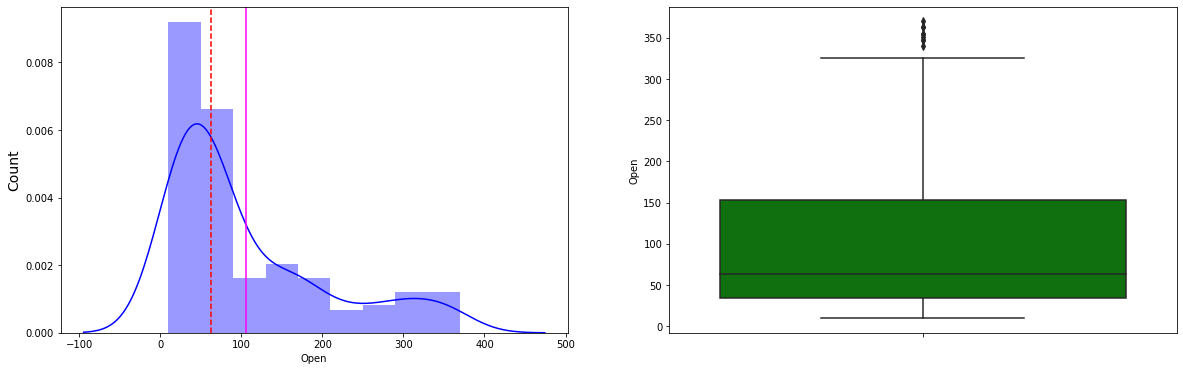

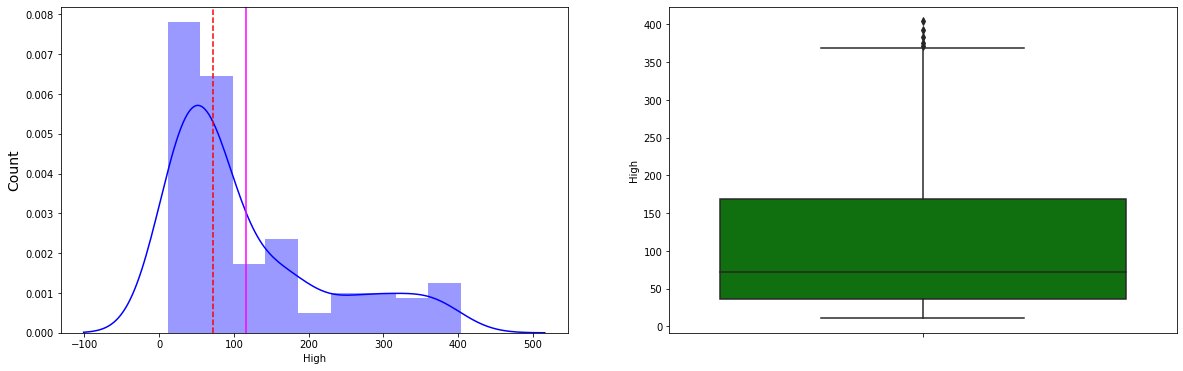

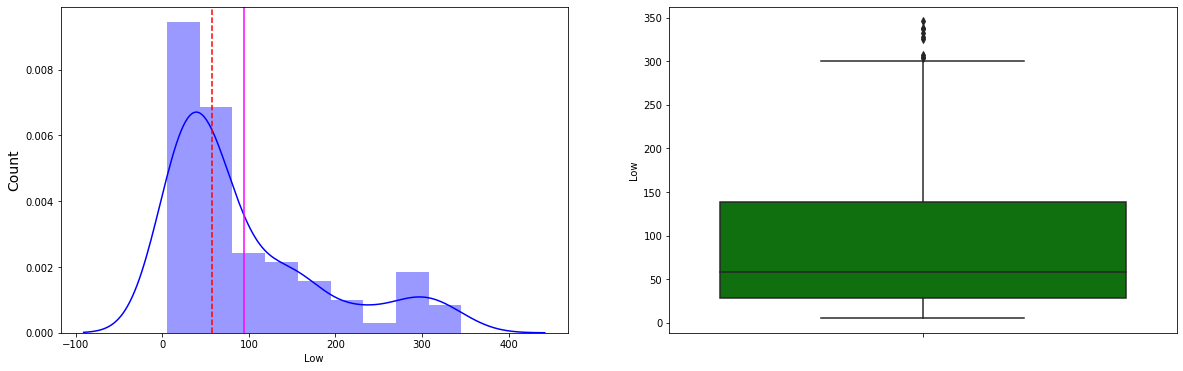

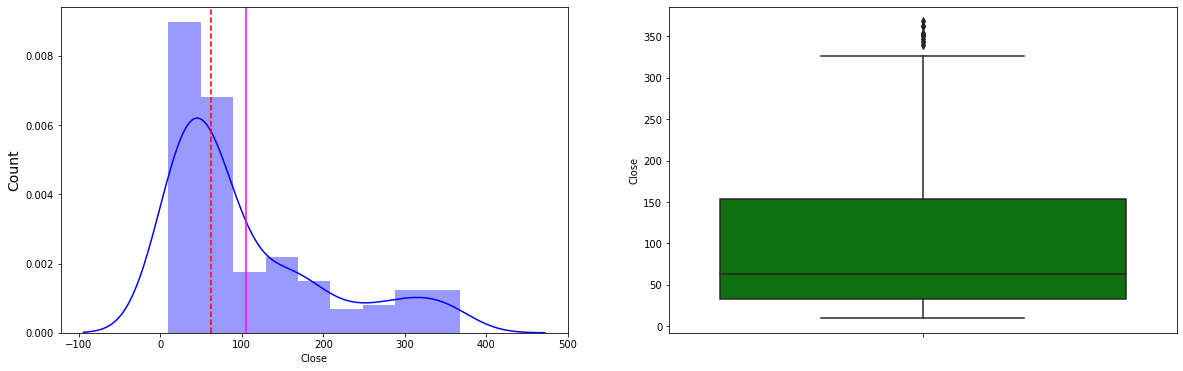

In [19]:
# plot a bar plot for each numerical feature and see the ditriution is normal or not

for col in numeric_features:
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(stock_price_df[col], color="blue")

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot  

    plt.ylabel("Count", size=14)
    plt.axvline(stock_price_df[col].mean(),color='magenta',linewidth=1.5)
    plt.axvline(stock_price_df[col].median(),color='red',linestyle="dashed",linewidth=1.5)

# create boxplot to see if there is any outliers in any column or not
# use subplot() function of matplotlib to create boxplot in this figure itself
# box plot is used to check outliers are present in respective features or not

    plt.subplot(1, 2, 2)
    sns.boxplot(y=stock_price_df[col], color="green")
 
plt.show()

The above graph shows that they are not a normal distribution curve.<br>
The mean and median should be equal for perfect normal distribution curve.But,mean is not equal to median as there is not a perfect normal distribution curve.
<br>
We need to convert all the features to normal distribution using log transformation.<br>
Outliers are present in each column.By, converting our features to normal distribution using log transform .We can remove outliers from the dataset.

Log tranformation to convert features to Normal Distribution

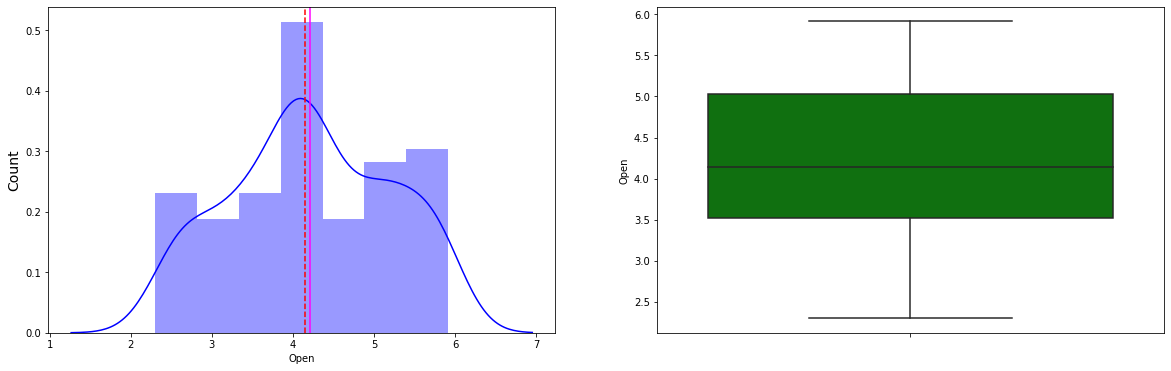

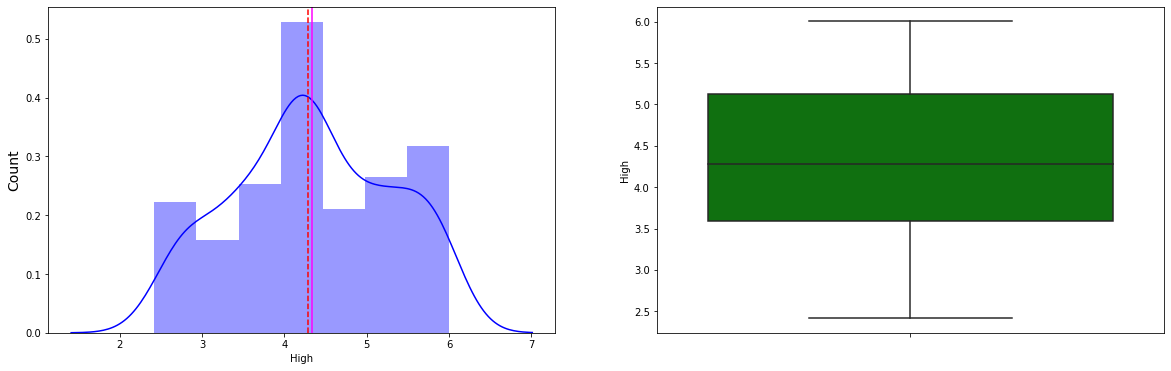

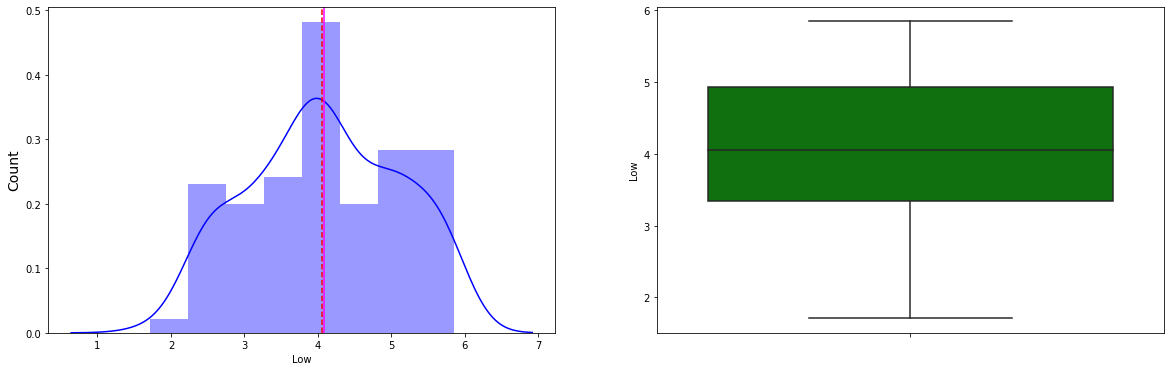

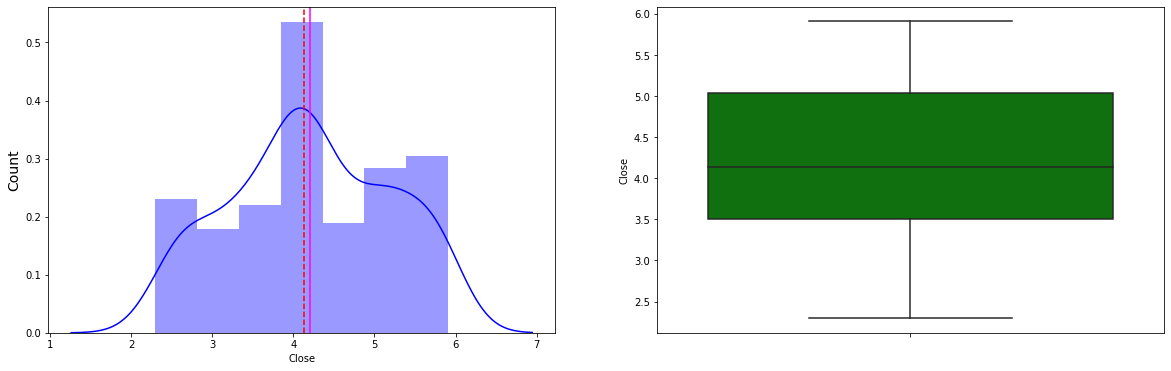

In [20]:
# log tranformation to convert a column to normal distribution

for col in numeric_features:
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)

# np.log() is a method in numpy library to convert our dataset values into log transformation to get a normal distribution curve

    feature_to_log = np.log(stock_price_df[col])  # assign log tranformation value into a variable 
    sns.distplot(feature_to_log, color="blue")

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot  

    plt.ylabel("Count", size=14)
    plt.axvline(feature_to_log.mean(),color='magenta',linewidth=1.5)
    plt.axvline(feature_to_log.median(),color='red',linestyle="dashed",linewidth=1.5)

# create boxplot to see if there is any outliers in any column or not
# use subplot() function of matplotlib to create boxplot in this figure itself

    plt.subplot(1, 2, 2)
    sns.boxplot(y=feature_to_log, color="green")
 
plt.show()

From the above graph, We see that now our graph is nearly close to normal distribution.<br>
Mean is nearly equal to median.<br>
Median is shown by dashed line.<br>
From the box plot, We see that outliers are removed by log transformation.<br>

**Check how the different stock price vary after fraud case 2018**

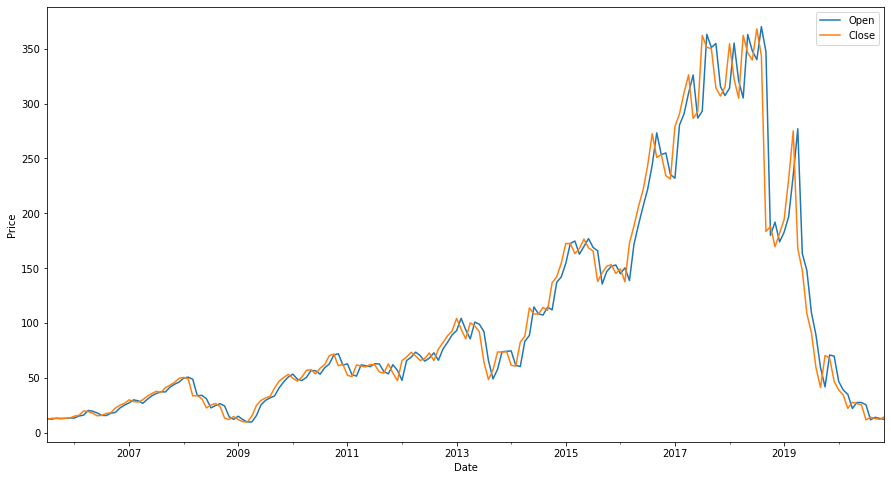

In [21]:
# Line plot to see how the "Open" and "Close" stock price of Yes Bank is affected after 2018 fraud case

stock_price_df[['Open','Close']].plot(kind='line',ylabel="Price",figsize=(15,8))

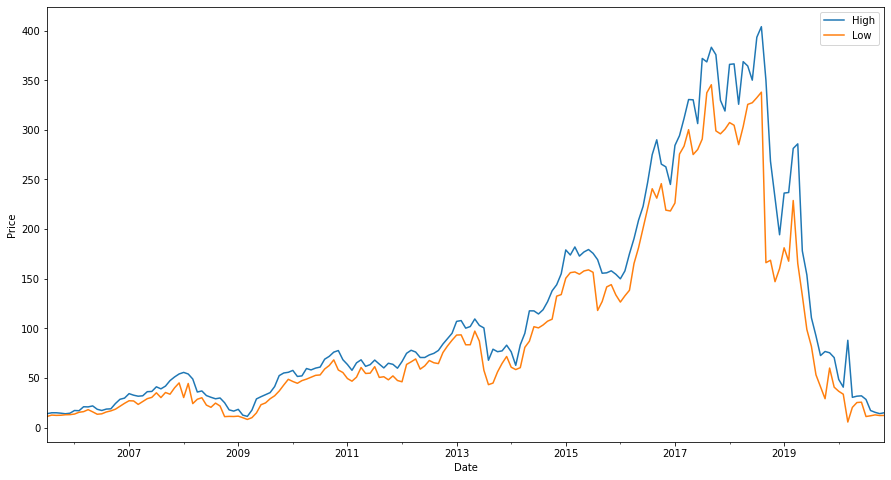

In [22]:
# Check how the "High" and "Low" stock are affected after 2018 fraud case


stock_price_df[['High','Low']].plot(kind='line',ylabel="Price",figsize=(15,8))

Creating dependent and independent variables

In [23]:
# Creating a dependent variable i.e 'Y'

dependent_variable = stock_price_df.iloc[:,-1]  # use iloc method of the dataframe to select only dependent variable i.e. last column
dependent_variable.values   # print column values into an array

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

In [24]:
independent_variables = stock_price_df.iloc[:,:-1] # use iloc method of the dataframe to select all independent variable i.e. except last column
independent_variables

,Open,High,Low
Date,,,
2005-07-01,13.00,14.00,11.25
2005-08-01,12.58,14.88,12.55
2005-09-01,13.48,14.87,12.27
2005-10-01,13.20,14.47,12.40
2005-11-01,13.35,13.88,12.88
...,...,...,...
2020-07-01,25.60,28.30,11.10
2020-08-01,12.00,17.16,11.85
2020-09-01,14.30,15.34,12.75


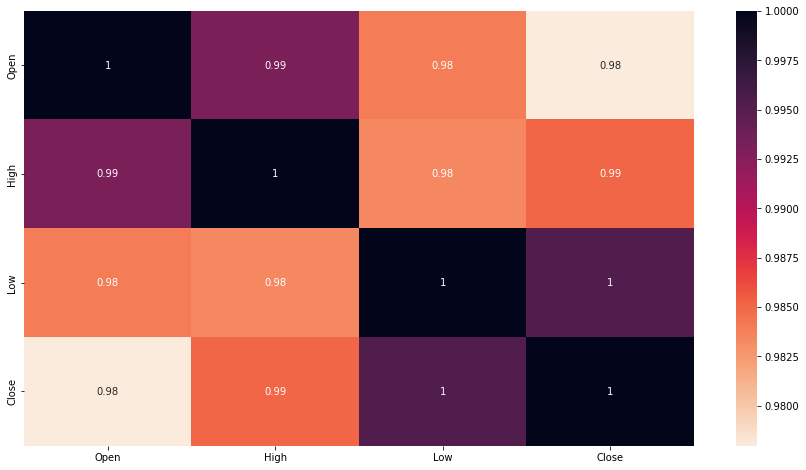

In [25]:
# Correlation between each and every column of the dataframe

plt.figure(figsize=(15,8))
correlation = stock_price_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='rocket_r')

The above heat map shows that all the features are highly correlated with each other.

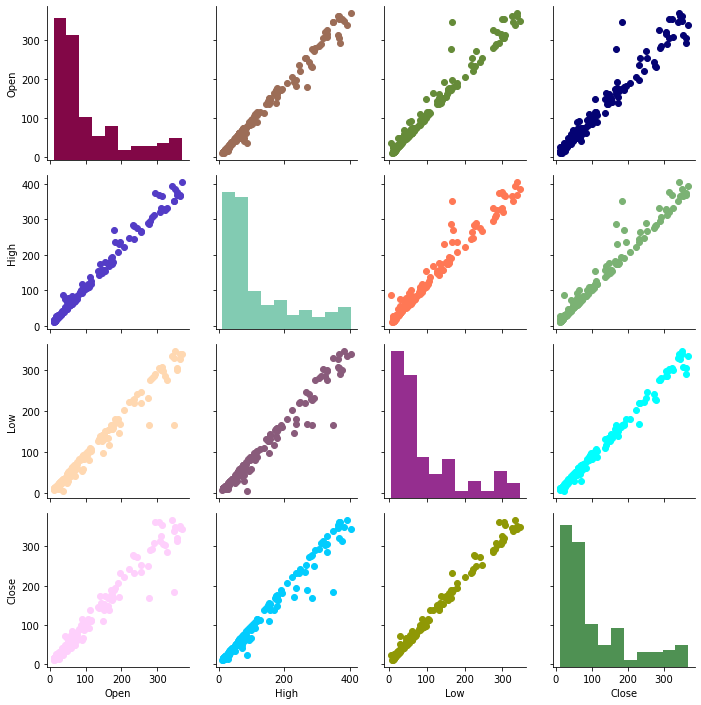

In [26]:
# It plot each and every column of our df with other column

colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)

g = sns.PairGrid(stock_price_df)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)

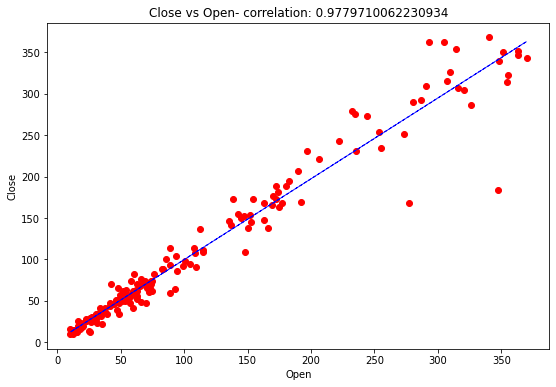

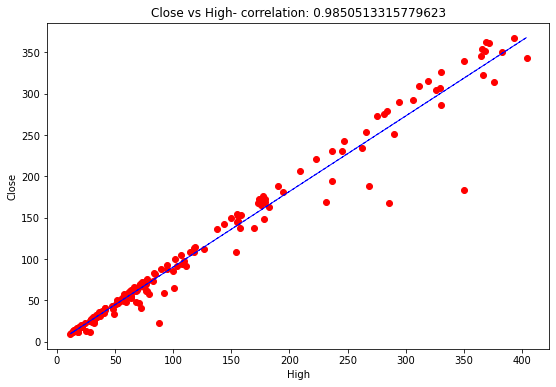

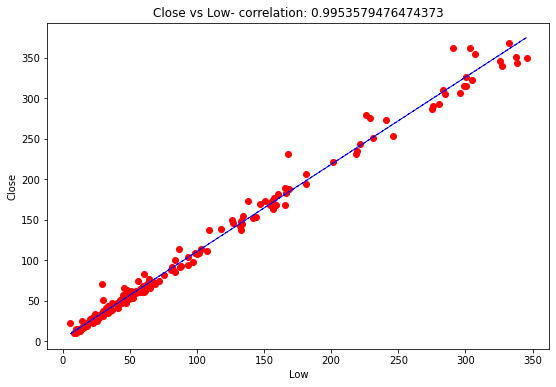

In [27]:
# find correlation betweeen different dependent variables "Close" to all independent variable

for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = stock_price_df[col] # store column in variable
    label = stock_price_df['Close']  # it store independent variable
    correlation = feature.corr(label)  # it calculate correlation between dependent vs independent variable
    plt.scatter(x=feature, y=label,c="r")    # use scatter plot to show correlation

    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))  # print correlation value with title on graph plotted below

    # let draw a line to make scatter plot more attractive to see correlation between values more clearly
    # use polyfit() function in numpy to draw a line that best fit the values 

    z = np.polyfit(stock_price_df[col], stock_price_df['Close'], 1)
    y_hat = np.poly1d(z)(stock_price_df[col])
    plt.plot(stock_price_df[col], y_hat,color="blue", lw=1,ls="dashed")

plt.show()

The above graphs depicts that there is high correlation between dependent(Close) and independent(High,Low,Open) features.<br>
We try to reduce the correlation for better prediction of the model.<br>
We calculate the VIF factor to reduce the multicollinearity between independent variables.

In [28]:
# Multicollinearity
# Calculate VIF(Variation Inflation Factor) to see the correlation between independent variables

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [29]:
calc_vif(stock_price_df[[i for i in stock_price_df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


VIF scores are high so it implies that associated independent variables are highly collinear to each other in the dataset.
As all the variables are equally important for closing stock price prediction, so I will not be performing any kind of feature engineering here.
I am not removing any column because all the columns are equally important for prediction.
Removing column lead to loss of valuable information(features) which are essential for accurate prediction for the model.It resukts in bad model.So,I am not deleting any featues form the dataset and try to predict the result and see how the model performs with multicollinearity and evaluate the performance of the model.

**Model Implementation**